### IMPORTACIÓN DE PAQUETES

In [1]:
!pip install yfinance

In [2]:
!pip install arch

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 

from arch import arch_model
from math import sqrt
import seaborn as sns

import yfinance
import warnings
warnings.filterwarnings("ignore")

sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### DATA

In [4]:
data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", end = "2021-05-31", 
                              interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
df = data.copy()

[*********************100%***********************]  4 of 4 completed


In [5]:
df['spx'] = df['^GSPC'].Close[:]
df['dax'] = df['^GDAXI'].Close[:]
df['ftse'] = df['^FTSE'].Close[:]
df['nikkei'] = df['^N225'].Close[:]
del df['^N225']
del df['^GSPC']
del df['^GDAXI']
del df['^FTSE']
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [6]:
df['market_value']=df.ftse

In [7]:
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

### RETORNOS

In [8]:
df['ret'] = df.market_value.pct_change(1)*100

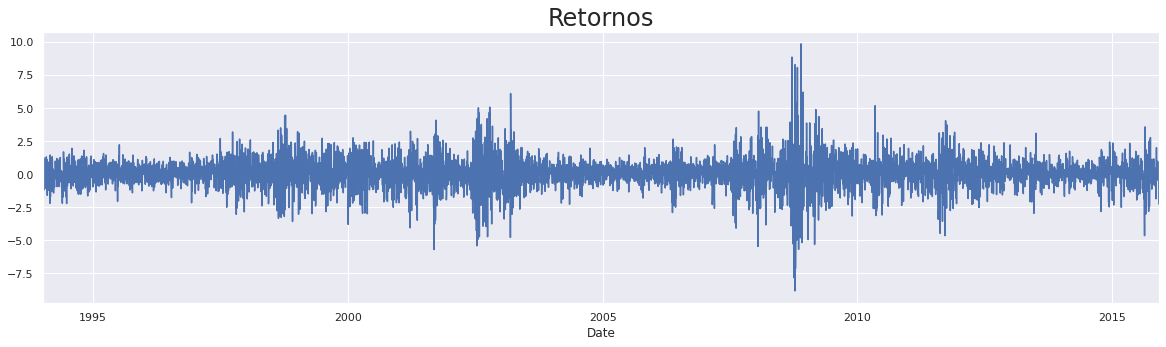

In [9]:
df.ret.plot(figsize=(20,5))
plt.title("Retornos", size = 24)
plt.show()

### VOLATILIDAD

In [10]:
df['sq_ret'] = df.ret.mul(df.ret)

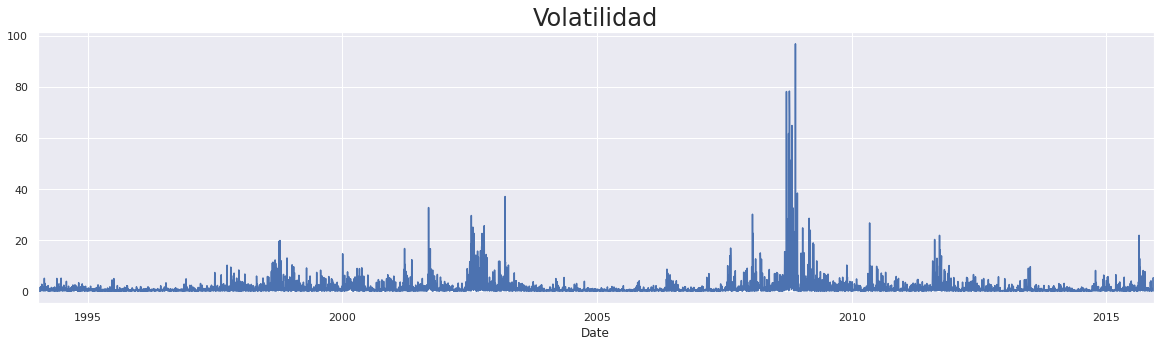

In [11]:
df.sq_ret.plot(figsize=(20,5))
plt.title("Volatilidad", size = 24)
plt.show()

### FUNCIONES DE AUTOCORRELACIÓN

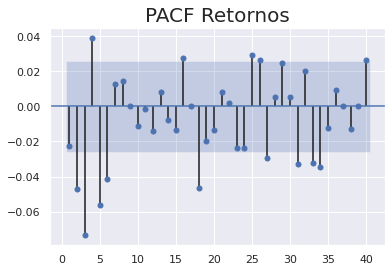

In [12]:
sgt.plot_pacf(df.ret[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF Retornos", size = 20)
plt.show()

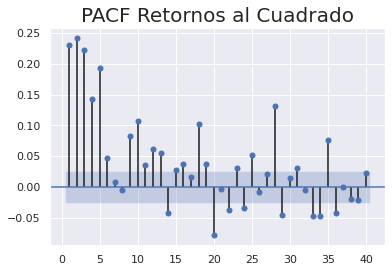

In [13]:
sgt.plot_pacf(df.sq_ret[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF Retornos al Cuadrado", size = 20)
plt.show()

### MODELO ARCH

In [14]:
from arch import arch_model

In [19]:
model_arch_1 = arch_model(df.ret[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 6)
results_arch_1.summary()

Iteration:      6,   Func. Count:     39,   Neg. LLF: 8553.748916036711
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8553.748916036679
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8553.75
Distribution:                  Normal   AIC:                           17113.5
Method:            Maximum Likelihood   BIC:                           17133.5
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        03:59:58   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0340  1.466e-02      2.317  2.050e-02 [5.233e-03,6.268e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8691  3.816e-02     22.775 8.135e-115 [  0.794,  0.944]
alpha[1]       0.3664  4.708e-02      7.783  7.061e-15 [  0.274,  0.459]
========================================================================

Covariance estimator: robust
"""

### MODELOS ARCH DE ORDEN SUPERIOR (Higher-Lag)

In [16]:
model_arch_2 = arch_model(df.ret[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 8322.626956796012
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8322.588077837883
            Iterations: 8
            Function evaluations: 60
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8322.59
Distribution:                  Normal   AIC:                           16653.2
Method:            Maximum Likelihood   BIC:                           16679.8
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        03:51:32   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0441  1.281e-02      3.440  5.811e-04 [1.896e-02,6.918e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6648  3.211e-02     20.705  3.155e-95 [  0.602,  0.728]
alpha[1]       0.2231  3.273e-02      6.817  9.271e-12 [  0.159,  0.287]
alpha[2]       0.2687  3.341e-02      8.042  8.844e-16 [  0.203,  0.334]
========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_3 = arch_model(df.ret[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     94,   Neg. LLF: 7827.217476856583
Iteration:     10,   Func. Count:    189,   Neg. LLF: 7817.737377889391
Iteration:     15,   Func. Count:    282,   Neg. LLF: 7814.863520714409
Iteration:     20,   Func. Count:    378,   Neg. LLF: 7814.437934779771
Iteration:     25,   Func. Count:    471,   Neg. LLF: 7814.378419506376
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7814.378092522372
            Iterations: 28
            Function evaluations: 522
            Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7814.38
Distribution:                  Normal   AIC:                           15658.8
Method:            Maximum Likelihood   BIC:                           15758.5
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        04:30:01   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0440  1.110e-02      3.969  7.227e-05 [2.229e-02,6.578e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1890  2.053e-02      9.204  3.460e-20      [  0.149,  0.229]
alpha[1]       0.0661  1.748e-02      3.782  1.556e-04    [3.185e-02,  0.100]
alpha[2]       0.1117  1.871e-02      5.971  2.364e-09    [7.505e-02,  0.148]
alpha[3]       0.1393  2.480e-02      5.615  1.970e-08    [9.064e-02,  0.188]
alpha[4]       0.0843  2.012e-02      4.192  2.767e-05    [4.490e-02,  0.124]
alpha[5]       0.0702  1.688e-02      4.157  3.225e-05    [3.709e-02,  0.103]
alpha[6]       0.0816  1.764e-02      4.625  3.742e-06    [4.703e-02,  0.116]
alpha[7]       0.0383  1.756e-02      2.178  2.939e-02  [3.833e-03,7.267e-02]
alpha[8]       0.0649  1.725e-02      3.764  1.670e-04  [3.112e-02,9.872e-02]
alpha[9]       0.0294  1.543e-02      1.904  5.686e-02 [-8.574e-04,5.963e-02]
alpha[10]      0.0326  1.503e-02      2.167  3.023e-02  [3.112e-03,6.203e-02]
alpha[11]      0.0667  1.671e-02      3.991  6.592e-05  [3.392e-02,9.941e-02]
alpha[12]      0.0497  1.633e-02      3.046  2.320e-03  [1.773e-02,8.175e-02]
alpha[13]      0.0290  1.286e-02      2.256  2.408e-02  [3.805e-03,5.422e-02]
=============================================================================

Covariance estimator: robust
"""